# Author : Jaypraksh Kakde

### GRIPFEB2022 - Data science & Business Analytics Intern at The Sparks Foundation

### Task 1 : Prediction using Unsupervised  Machine Learning

In [31]:
# importing package
import pandas as pd

# Reading the CSV file
df = pd.read_csv("Iris.csv")

## First we will see our data briefly.

In [32]:
# Printing top 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.shape     # This will Tell dimensions of dataset

(150, 6)

In [34]:
df.info()   # This will tell name and datatype of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can see that only one column has categorical data and all the other columns are of the numeric type with non-Null entries.

In [35]:
df.describe()       # get a quick statistical summary of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We can see the count of each column along with their mean value, standard deviation, minimum and maximum values.

In [36]:
df.isnull().sum() # it will check if our data contains any missing values or not.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see that no column as any missing value. So we don'have to handel null value here. 

Let’s see if the dataset is balanced or not i.e. all the species contain equal amounts of rows or not.

In [37]:
df.Species.value_counts()  # This function returns a Series containing counts of unique values.

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

We can see that all the species contain an equal amount of rows, so we should not delete any entries.

## Data Cleaning

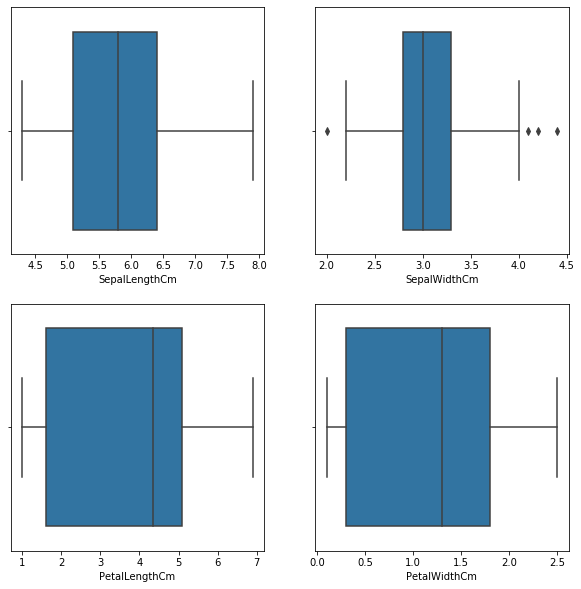

In [38]:
# We will plot box-plot to see, if there are any outliers in data.
import matplotlib.pyplot as plt

# Made function for ploting box-plot
def graph1(x_data):
    sns.boxplot(x=x_data, data=df)

# Code for ploting
plt.figure(figsize=(10,10))  # This will spcifify figure-size of graph.

plt.subplot(221)             # This will tell, where to plot it.
graph1('SepalLengthCm')      # This will tell, what to plot in that area.

plt.subplot(222)
graph1('SepalWidthCm')

plt.subplot(223)
graph1('PetalLengthCm')

plt.subplot(224)
graph1('PetalWidthCm')

In the above graph,We can see only "SepalWidthCm" have 4 outliers other parameter don't have any outliers.

### Imputing the Outliers

(array([15, 32, 33]),)
(array([60]),)
(array([15, 32, 33]), array([60]))
3.0


/home/jayprakash/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


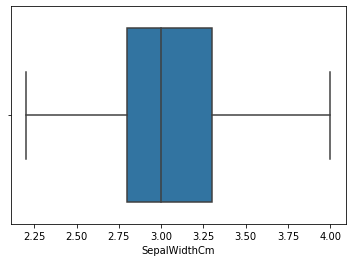

In [39]:
# importing packages
from sklearn.datasets import load_boston
import numpy as np
from statistics import median

# IQR
Q1 = np.percentile(df['SepalWidthCm'], 25)

Q3 = np.percentile(df['SepalWidthCm'], 75)

IQR = Q3 - Q1

# index of Upper bound outliers
upper_bound_outlier = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
print(upper_bound_outlier)

# index of Lower bound outliers
lower_bound_outlier = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))
print(lower_bound_outlier)

outliers = upper_bound_outlier + lower_bound_outlier
print(outliers)

Median = median(df.SepalWidthCm)
print(Median)

# Imputing the Outliers
for i in outliers:
    df.SepalWidthCm[i] = Median

sns.boxplot(x='SepalWidthCm', data=df)

## Data Visualization

#### Our target column will be the Species column because at the end we will need the result according to the species only.

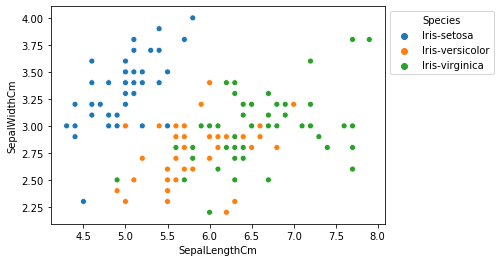

In [40]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# Comparing Sepal Length and Sepal Width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',hue='Species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

From the above plot, we can infer that – 

Species Setosa has smaller sepal lengths but larger sepal widths.

Versicolor Species lies in the middle of the other two species in terms of sepal length and width

Species Virginica has larger sepal lengths but smaller sepal widths.

#### Relation between variables We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

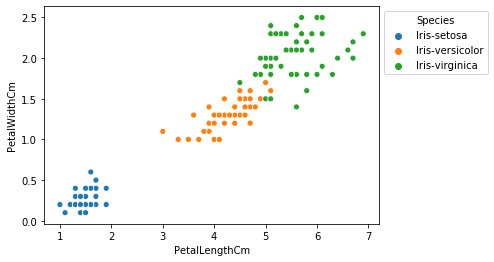

In [41]:
# Comparing Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

From the above plot, we can infer that – 

Species Setosa has smaller petal lengths and widths.

Versicolor Species lies in the middle of the other two species in terms of petal length and width

Species Virginica has the largest of petal lengths and widths.

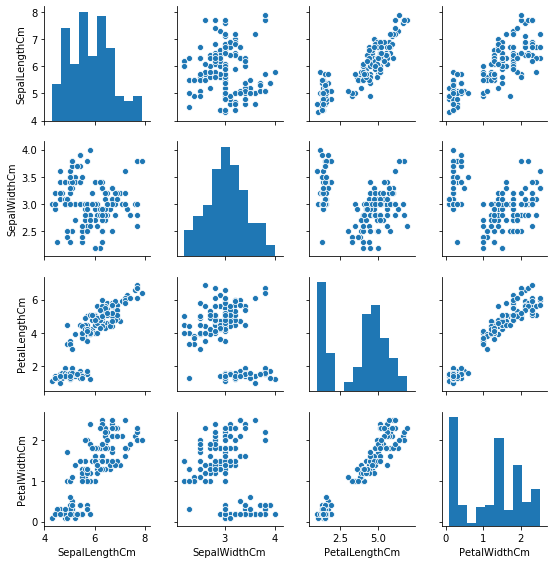

In [42]:
sns.pairplot(df.drop(['Id'], axis = 1), height=2)  
# plot all the column’s relationships using a pairplot.
# Here we can get an idea about interrealtionship between variables.

#### Histogram

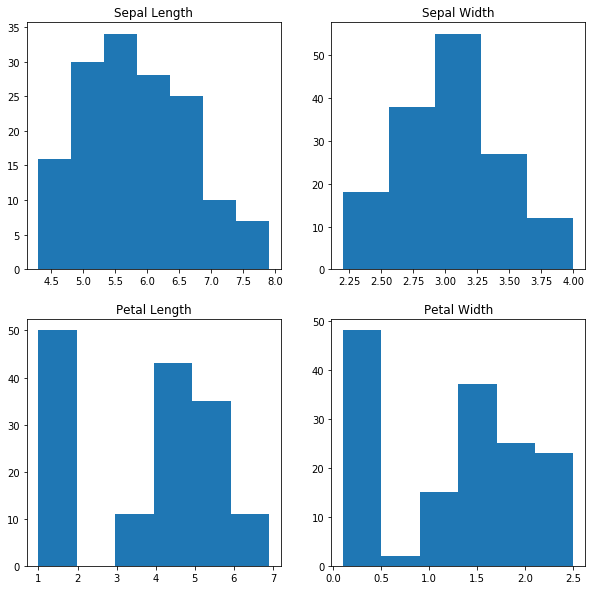

In [43]:
# Histogram will allow us to see the distribution of data for various columns. 
# It can be used for uni as well as bi-variate analysis.
# Here we will use histogram for univariate analysis. 

fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

From the above plot, we can see that – 

The highest frequency of the sepal length is between 5.5 and 6

The highest frequency of the sepal Width is between 3.0 and 3.5

The highest frequency of the petal length is between 1 and 2

The highest frequency of the petal width is between 0.0 and 0.5

### Handling Correlation

In [44]:
df.corr(method='pearson')  # This gives us pairwise correalation between variables.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.376836,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.111724,0.871754,0.817954
SepalWidthCm,-0.376836,-0.111724,1.000000,-0.387514,-0.321513
PetalLengthCm,0.882747,0.871754,-0.387514,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.321513,0.962757,1.000000


### Heatmaps
we can plot the above-found correlation using the heatmaps.

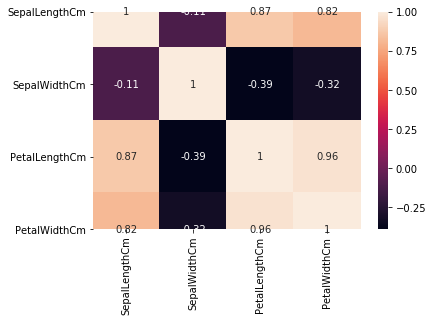

In [45]:
sns.heatmap(df.corr(method='pearson').drop( ['Id'], axis=1).drop(['Id'], axis=0),annot = True);
plt.show()

From the above graph, we can see that –

Petal width and petal length have high correlations.
Petal length and sepal width have good correlations.
Petal Width and Sepal length have good correlations.

### Elbow Method

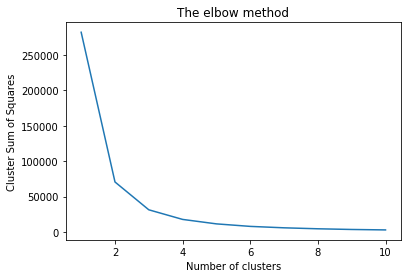

In [46]:
df = pd.read_csv("Iris.csv")
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum of Squares') 
plt.show()

From above Graph we can see that as explain within cluster sum of square changes does not deacrease singnificatly after we choses number of clusters more than 3. So optimal number of clusters are 3.

### Preprocessing the dataset :
Using an inbuilt library called ‘train_test_split’, which divides our data set into a ratio of 80:20. 80% will be used for training, evaluating, and selection among our models and 20% will be held back as a validation dataset.

In [47]:
from sklearn.model_selection import train_test_split
# Whole dataset except target varible
x = df.iloc[:, :-1].values 
# Our target variable here in this case 'Species'
y = df.iloc[:,   -1].values 

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)  

### For Those who don't have any idea what K-means is :
K-means Clustering:
The goal of the K-means clustering algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of the K groups based on the features that are provided.

The outputs of executing a K-means on a dataset are:
● K centroids: Centroids for each of the K clusters identified from the dataset.
● Labels for the training data: Complete dataset labelled to ensure each data point is assigned to one of the clusters.

[[ 25.5     5.006   3.418   1.464   0.244]
 [125.5     6.588   2.974   5.552   2.026]
 [ 75.5     5.936   2.77    4.26    1.326]]


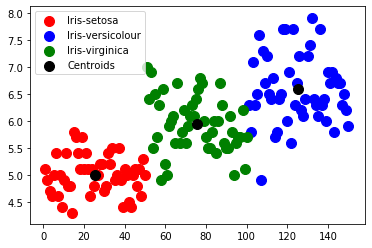

In [48]:
# Using K-means clustering on Iris dataset:
from sklearn.cluster import KMeans

#Applying Kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter = 100, n_init = 10, random_state = 0) 
y_kmeans = kmeans.fit_predict(x)

#display cluster centers
print(kmeans.cluster_centers_) 

#Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')  
plt.legend()
plt.show()

An insight we can get from the scatterplot is the model’s accuracy in determining Setosa and Virginica is comparatively more to Versicolour.

# Thank You